In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv("data/Superstore.csv",encoding='latin1')
df = data.loc[:,["Customer Name", "Segment", "Country", "City", "State", "Region", "Category",  "Sub-Category", "Order Date", "Ship Date", "Product Name", "Sales",  "Quantity", "Discount", "Profit"]]
df.nunique()

Customer Name     793
Segment             3
Country             1
City              531
State              49
Region              4
Category            3
Sub-Category       17
Order Date       1237
Ship Date        1334
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

1. Creation des nouvelle variables :  

  - Marge (%) = (Profit / Sales) * 100.
  - Délai de livraison = Ship Date - Order Date.


In [3]:
df["Marge"] = (df["Profit"]/df["Sales"])*100


1. Analyse descriptive des données
   * Statistique univariée

<Axes: ylabel='Profit'>

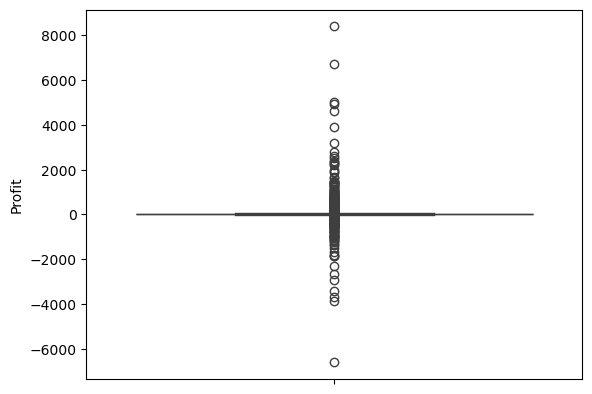

In [4]:
sns.boxplot(data=df, y="Profit")

Quels sont les produits les plus vendus en supermarché ?

In [5]:
# Quels sont les produits les plus vendus en supermarché
top5_selling_product = (
    df.groupby(['Product Name'], as_index=False)
    .agg({"Sales": "sum", "Category": "first"})   # fonction de pandas agg
    .sort_values("Sales", ascending=False)
    .head(5)
)

top5_selling_product


,Product Name,Sales,Category
404,Canon imageCLASS 2200 Advanced Copier,61599.824,Technology
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,Office Supplies
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480,Technology
786,HON 5400 Series Task Chairs for Big and Tall,21870.576,Furniture
686,GBC DocuBind TL300 Electric Binding System,19823.479,Office Supplies


In [6]:
# sns.barplot(data=top5_selling_product, x="Product Name", y="Sales")
# plt.xticks(rotation=45) 

In [7]:
fig = px.bar(
    top5_selling_product,
    x="Product Name",
    y="Sales",
    template='plotly_dark',
    color="Category",
    title="TOP 5 PRODUITS LES PLUS VENDUS DANS LE SUPERMARCHE",
    text_auto=True,
)

fig.update_layout(xaxis_title="Produits", yaxis_title="Ventes")
iplot(fig)


Principaux produits vendus :

Le produit *Canon imageCLASS 2200 Advanced Copier* domine largement les ventes avec 61,6k unités,  
ce qui montre son attrait ou son rôle essentiel dans le portefeuille.
Les autres produits, comme Fellowes PB500 Electric Punch et HON 5400 Series Task Chairs,  
ont des ventes significativement plus faibles, avec respectivement 27,4k et 21,8k unités.
Catégories des produits :

*Technology* est bien représenté avec les deux premières positions : cela suggère que cette catégorie est un pilier des ventes.
Office Supplies et Furniture occupent des places importantes, mais semblent moins dominantes que les produits technologiques.
Interprétation stratégique :

*Canon imageCLASS 2200 Advanced Copier* devrait bénéficier de plus d'investissements publicitaires et d'approvisionnement, car il est clairement un produit phare.
Pour les catégories moins performantes, comme Furniture, il peut être intéressant d’identifier des moyens pour stimuler les ventes, comme des promotions ou de nouvelles stratégies de présentation.


les Top Products avec des benefices

In [8]:
# les Top Products avec des benefices
top5_profitable_products = df[df['Profit']>=0].groupby(['Product Name'])['Profit'].sum().sort_values(ascending=False).head()
fig = px.bar(top5_profitable_products,x = top5_profitable_products ,
            template='plotly_dark',
            color= top5_profitable_products,
            title='TOP 5 PRODUITS LES PLUS PROFITABLES'.upper() ,
            text_auto=True , 
            
            )

fig.update_layout(
   xaxis_title='total profit ',
)

iplot(fig)

1. Description : Ce graphique montre les 5 produits générant le plus de profit dans le supermarché.
2. Observations :
- Le produit Canon imageCLASS 2200 Advanced Copier domine en termes de rentabilité avec un total de 25.199k.
- Suivi par le produit Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind, qui génère un profit de 11.184k.
- Les produits Hewlett Packard LaserJet 3310 Copier, GBC DocuBind TL300 Electric Binding System et Ibico EPK-21 Electric Binding System complètent la liste des plus profitables, avec des profits respectifs entre 6.27k et 6.98k.
3. Interprétation :
- Les produits de la catégorie Copiers et Binding Systems dominent clairement les profits, ce qui pourrait indiquer une forte demande pour ces équipements spécifiques ou une excellente stratégie de pricing dans cette catégorie.
- Le produit Canon est particulièrement remarquable pour sa rentabilité exceptionnelle, représentant à lui seul une grande partie des profits du top 5.


Les produits qui encoure des pertes 

In [9]:
# Les produits qui encoure des pertes 
top5_loss_products = df[df['Profit']<0].groupby(['Product Name'])['Profit'].sum().sort_values(ascending=False).head()
fig = px.bar(top5_loss_products,x = top5_loss_products ,
            template='plotly_dark',
            color= top5_loss_products,
            title='PRODUITS AVEC LES PLUS GRANDES PERTES'.upper() ,
            text_auto=True , 
            
            )

fig.update_layout(
   xaxis_title='total perte ',
)

iplot(fig)

1. Description :
Ce graphique met en avant les 5 produits ayant engendré les plus grandes pertes financières.

2. Observations :

- Le produit C-Line Cubicle Keepers Polypropylene Holder With Velcro Backings affiche la perte la plus importante avec -0.9933k.
Avery Binder Labels et Brites Rubber Bands, 1 1/2 oz. Box suivent respectivement avec des pertes de -0.8558k et -0.7128k.
- Les Bagged Rubber Bands et SanDisk Cruzer 16 GB USB Flash Drive présentent des pertes moindres mais significatives, respectivement de -0.6048k et -0.3444k.
3. Interprétation :

- Les produits associés à des fournitures de bureau, comme les porte-documents, les étiquettes, et les élastiques, sont sur-représentés dans cette liste. Cela peut 
- signaler soit une faible demande, soit une mauvaise gestion des stocks ou des prix trop bas.
- La perte sur le SanDisk Cruzer 16 GB USB Flash Drive pourrait être liée à des promotions excessives, des remises importantes, ou des coûts dépassant les marges attendues.

Quelle est la tendance des ventes au fil du temps (mensuelle, annuelle)

In [10]:
# Quelle est la tendance des ventes au fil du temps (mensuelle, annuelle)
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["year"] = df["Order Date"].dt.year
df['month'] = df["Order Date"].dt.to_period('M').astype(str)

In [11]:
monthly_sales = df.groupby('month')['Sales'].sum().reset_index()
yearly_sales = df.groupby('year')['Sales'].sum().reset_index()

In [12]:
fig = px.bar(
    yearly_sales,
    x="year",
    y="Sales",
    template='plotly_dark',
    color_discrete_sequence=['#C0C0C0'],
    title="TENDANCE DES VENTES ANNUELLES",
    text_auto=True,
)
fig.update_layout(xaxis_title="Année", yaxis_title="Ventes Totales")
fig.show()

fig = px.line(
    monthly_sales,
    x="month",
    y="Sales",
    template='plotly_dark',
    color_discrete_sequence=['#b1e7cd'],
    title="TENDANCE DES VENTES MENSUELLES",
)
fig.update_layout(xaxis_title="Mois", yaxis_title="Ventes Totales")
fig.show()

Quelle catégorie de produits génère le profit le plus élevé ?

In [13]:
category = df.groupby("Category")["Profit"].sum().sort_values(ascending=True).reset_index()
category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


In [14]:
colors = ["#b1e7cd","#854442","#000000","#fff4e6","#3c2f2f",
         "#be9b7b ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
         "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]
fig = px.bar(category,
            y=category['Category'],
            x=category['Profit'],
            template='plotly_dark',
            color_discrete_sequence=[colors[8]],text_auto=True
            )

fig.update_layout(
   bargap = 0.6,
   title='total profit for each category ',
   )

fig.show()

In [15]:
# sous_category = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=True).reset_index()
# sous_category

Quelle région génère le plus de ventes ?

In [16]:
Regions_most_sales = df.groupby('Region')["Sales"].sum().sort_values(ascending=True).reset_index()
fig=px.bar(Regions_most_sales ,
         x=Regions_most_sales['Sales'],
         y='Region',
         template='plotly_dark',
         color_discrete_sequence=[colors[7]],text_auto=True)
fig.update_layout(
   bargap = 0.6,
   title='Most sales by each region  ',
   )

fig.show()


In [17]:
# df["Category"].value_counts(normalize=True).plot(kind="bar",rot=45)

*  Segment
   - Consumer : consommateur
   - corporate : entreprise 
   - Home office : bureau à domicile 

In [18]:
segement = df.groupby("Segment")["Sales"].sum().sort_values(ascending=True).reset_index()
fig=px.bar(segement ,
         x=segement['Sales'],
         y='Segment',
         template='plotly_dark',
         color_discrete_sequence=[colors[6]],text_auto=True)
fig.update_layout(
   bargap = 0.6,
   title='Most sales by each segment  ',
   )

fig.show()


Analyser les produit ou les sous produit qui encourent des pertes 

In [19]:
# Filtrer les données avec des pertes uniquement
loss_data = df[df["Profit"] < 0]

# **1. Identifier les produits avec les pertes les plus élevées**
top_loss_products = (
    loss_data.groupby("Product Name")["Profit"]
    .sum()
    .sort_values(ascending=True)
    .reset_index()
    .head(10)  # Top 10 produits en pertes
)

In [20]:
# Visualisation : Pertes par produit
fig = px.bar(
    top_loss_products,
    x="Profit",
    y="Product Name",
    orientation="h",
    template="plotly_dark",
    color="Profit",
    color_continuous_scale="reds",
    title="Top 10 Produits Enregistrant des Pertes",
    text_auto=True,
)
fig.update_layout(xaxis_title="Pertes Totales", yaxis_title="Produits")
fig.show()

In [21]:
# **2. Identifier les catégories avec les pertes les plus élevées**
loss_by_category = (
    loss_data.groupby("Category")["Profit"]
    .sum()
    .sort_values(ascending=True)
    .reset_index()
)

# Visualisation : Pertes par catégorie
fig = px.bar(
    loss_by_category,
    x="Category",
    y="Profit",
    template="plotly_dark",
    color="Profit",
    color_continuous_scale="reds",
    title="Pertes par Catégorie",
    text_auto=True,
)
fig.update_layout(xaxis_title="Catégories", yaxis_title="Pertes Totales")
fig.show()


In [22]:
loss_by_subcategory = (loss_data
         .groupby("Sub-Category")["Profit"]
         .sum()
         .sort_values(ascending=False).
         reset_index())
# Visualisation : Pertes par sous-catégorie
fig = px.bar(
    loss_by_subcategory,
    x="Profit",
    y="Sub-Category",
    orientation="h",
    template="plotly_dark",
    color="Profit",
    color_continuous_scale="reds",
    title="Pertes par Sous-Catégorie",
    text_auto=True,
)
fig.update_layout(xaxis_title="Pertes Totales", yaxis_title="Sous-Catégories")
fig.show()

In [23]:
# **4. Explorer les facteurs communs des pertes**
# Exemple : Vérifier si les pertes sont liées à des remises élevées
loss_data["Discount Range"] = pd.cut(
    loss_data["Discount"],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8],
    labels=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50%+"],
)

discount_impact = (
    loss_data.groupby("Discount Range")["Profit"]
    .sum()
    .sort_values(ascending=True)
    .reset_index()
)

# Visualisation : Impact des remises sur les pertes
fig = px.bar(
    discount_impact,
    x="Discount Range",
    y="Profit",
    template="plotly_dark",
    color="Profit",
    color_continuous_scale="reds",
    title="Impact des Remises sur les Pertes",
    text_auto=True,
)
fig.update_layout(xaxis_title="Tranches de Remises", yaxis_title="Pertes Totales")
fig.show()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_18308\2933241604.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ibrah\AppData\Local\Temp\ipykernel_18308\2933241604.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Les produit qui n'ont pas de perte 

In [24]:
liste_perte = list(loss_data["Sub-Category"].unique())
liste_sous_categorie = list(df["Sub-Category"].unique())

# for sub_cat in liste_sous_categorie :
#     if sub_cat not in liste_perte:
#         print(sub_cat)
liste_sous_categie_sans_perte = [sub_cat for sub_cat in liste_sous_categorie if sub_cat not in liste_perte]
liste_sous_categie_sans_perte
['Labels', 'Art', 'Paper', 'Envelopes', 'Copiers']


['Labels', 'Art', 'Paper', 'Envelopes', 'Copiers']

In [25]:
# Filtrer le DataFrame pour inclure uniquement les sous-catégories dans liste_sous_categie_sans_perte
df_sans_perte = df[df["Sub-Category"].isin(liste_sous_categie_sans_perte)]
# Afficher les premières lignes du DataFrame filtré
df_sans_perte.head()

,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Order Date,Ship Date,Product Name,Sales,Quantity,Discount,Profit,Marge,year,month
2,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,2016-06-12,6/16/2016,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,47.0,2016,2016-06
6,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,2014-06-09,6/14/2014,Newell 322,7.280,4,0.0,1.9656,27.0,2014,2014-06
12,Andrew Allen,Consumer,United States,Concord,North Carolina,South,Office Supplies,Paper,2017-04-15,4/20/2017,Xerox 1967,15.552,3,0.2,5.4432,35.0,2017,2017-04
18,Zuschuss Donatelli,Consumer,United States,San Francisco,California,West,Office Supplies,Art,2014-08-27,9/1/2014,Newell 341,8.560,2,0.0,2.4824,29.0,2014,2014-08
21,Ken Black,Corporate,United States,Fremont,Nebraska,Central,Office Supplies,Art,2016-12-09,12/13/2016,Newell 318,19.460,7,0.0,5.0596,26.0,2016,2016-12


2. Analyse bivariée

In [26]:
pd.crosstab(df["Category"],df["Region"])

Region,Central,East,South,West
Category,,,,
Furniture,481,601,332,707
Office Supplies,1422,1712,995,1897
Technology,420,535,293,599


Analyse des profits moyens par région et par segment.

In [27]:
df[["Profit","Sales","Region","Category"]].groupby(["Category","Region"]).mean()

Profit       Sales
Category        Region                        
Furniture       Central  -5.968918  340.534644
                East      5.068496  346.574383
                South    20.395199  353.309289
                West     16.272914  357.302325
Office Supplies Central   6.244712  117.458801
                East     23.957114  120.044425
                South    20.086827  126.282727
                West     27.733183  116.422377
Technology      Central  80.231981  405.753124
                East     88.714084  495.278469
                South    68.231506  507.753952
                West     73.962687  420.687533

Croisement entre segement et category

In [28]:
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [29]:
pd.crosstab(df["Category"], df["Segment"])

Segment,Consumer,Corporate,Home Office
Category,,,
Furniture,1113,646,362
Office Supplies,3127,1820,1079
Technology,951,554,342
